# Exercise 1
```In this exercise you will experience with pandas, matplotlib and numpy. This are main tools we are going to use later in course, and which are extremly useful in a variety of tasks. For each question, answer it in cells directly beneath it.```

```You are more than encourged to read relevant parts, mainly from ``` [pandas' API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

```~ Ittai Haran```

## DataFrame basics

```A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames```

```import numpy and pandas```

In [0]:
import pandas as pd
import numpy as np

```Consider the following Python dictionary `data` and Python list `labels`:```

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

```Create a DataFrame `df` from this dictionary `data` which has the index `labels`.```

In [40]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data=data, index=labels)
print(df)

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  2.0       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


```Display a summary of the basic information about this DataFrame and its data using the decribe and the info functions```

In [41]:
print("description\n" + str(df.describe()))
print("\n")

print("information")
df.info()

description
            age     visits
count  8.000000  10.000000
mean   3.437500   1.900000
std    2.007797   0.875595
min    0.500000   1.000000
25%    2.375000   1.000000
50%    3.000000   2.000000
75%    4.625000   2.750000
max    7.000000   3.000000


information
<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
animal      10 non-null object
age         8 non-null float64
visits      10 non-null int64
priority    10 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


```Return the first 3 rows of the DataFrame `df`. Do it two times: use head and iloc```

In [42]:
print(df.head(3))
print("\n")

for i in range(3):
    print(df.iloc[i])
    print()

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no


animal      cat
age         2.5
visits        1
priority    yes
Name: a, dtype: object

animal      cat
age           3
visits        3
priority    yes
Name: b, dtype: object

animal      snake
age           0.5
visits          2
priority       no
Name: c, dtype: object



```Select just the 'animal' and 'age' columns from the DataFrame `df`.```

In [43]:
print(df["animal"])
print("")
print(df["age"])

a      cat
b      cat
c    snake
d      dog
e      dog
f      cat
g    snake
h      cat
i      dog
j      dog
Name: animal, dtype: object

a    2.5
b    3.0
c    0.5
d    NaN
e    5.0
f    2.0
g    4.5
h    NaN
i    7.0
j    3.0
Name: age, dtype: float64


```Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.```

In [44]:
print(df[['animal', 'age']].iloc[[3, 4, 8]])

  animal  age
d    dog  NaN
e    dog  5.0
i    dog  7.0


```Select only the rows where the number of visits is greater than 3. Pandas supports two useful APIs:
(df[boolean list/series]) returns the rows for which the value is True
(df[column] > num) returns a boolean series```

In [45]:
print(df[df['visits'] >= 3])

  animal  age  visits priority
b    cat  3.0       3      yes
d    dog  NaN       3      yes
f    cat  2.0       3       no


```Select the rows where the age is missing, i.e. is `NaN`.```

In [46]:
indicators = pd.isna(df['age'])
print(df[indicators])

  animal  age  visits priority
d    dog  NaN       3      yes
h    cat  NaN       1      yes


```Select the rows where the animal is a cat *and* the age is less than 3. You can use logical operands: &, |, ~```

In [47]:
cats_with_age_data = df[(df['animal'] == 'cat') & ~pd.isna(df['age'])]
print(cats_with_age_data[cats_with_age_data['age'] >= 3])

  animal  age  visits priority
b    cat  3.0       3      yes


```Select the rows the age is between 2 and 4 (inclusive).```

In [48]:
filtered_age_df = df[~pd.isna(df['age'])]
print(filtered_age_df[(filtered_age_df["age"] <= 4) & (filtered_age_df["age"] >= 2)])

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
f    cat  2.0       3       no
j    dog  3.0       1       no


```Change the age in row 'f' to 1.5.```

In [49]:
df['age', 'f'] = 1.5
df

,animal,age,visits,priority,"(age, f)"
a,cat,2.5,1,yes,1.5
b,cat,3.0,3,yes,1.5
c,snake,0.5,2,no,1.5
d,dog,NaN,3,yes,1.5
e,dog,5.0,2,no,1.5
f,cat,2.0,3,no,1.5
g,snake,4.5,1,no,1.5
h,cat,NaN,1,yes,1.5
i,dog,7.0,2,no,1.5
j,dog,3.0,1,no,1.5


```Calculate the sum of all visits (the total number of visits). Do it twice: using built in pandas functions and using numpy```

In [50]:
# No NaNs in current df, but still, just in case
filtered_visits_df = df[~pd.isna(df['visits'])]['visits']

print("Pandas Sum: " + str(filtered_visits_df.sum()))
print("Numpy Sum: " + str(np.sum(filtered_visits_df)))

Pandas Sum: 19
Numpy Sum: 19


```Calculate the mean age for each different animal in `df`.```

In [51]:


print(df[['animal', 'age']].groupby(['animal']).mean())

        age
animal     
cat     2.5
dog     5.0
snake   2.5


```Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.```

In [52]:
data = {'animal': ['cat'],
        'age': [3],
        'visits': [1],
        'priority': ['yes']}

# df = df.append(pd.DataFrame(data=data, index=[chr(ord(df.index[-1]) + 1)]), sort=False)
df = df.append(pd.DataFrame(data=data, index=['k']), sort=False)
print(df)
print()
df = df.drop(index=['k'])
print(df)

  animal  age  visits priority  (age, f)
a    cat  2.5       1      yes       1.5
b    cat  3.0       3      yes       1.5
c  snake  0.5       2       no       1.5
d    dog  NaN       3      yes       1.5
e    dog  5.0       2       no       1.5
f    cat  2.0       3       no       1.5
g  snake  4.5       1       no       1.5
h    cat  NaN       1      yes       1.5
i    dog  7.0       2       no       1.5
j    dog  3.0       1       no       1.5
k    cat  3.0       1      yes       NaN

  animal  age  visits priority  (age, f)
a    cat  2.5       1      yes       1.5
b    cat  3.0       3      yes       1.5
c  snake  0.5       2       no       1.5
d    dog  NaN       3      yes       1.5
e    dog  5.0       2       no       1.5
f    cat  2.0       3       no       1.5
g  snake  4.5       1       no       1.5
h    cat  NaN       1      yes       1.5
i    dog  7.0       2       no       1.5
j    dog  3.0       1       no       1.5


```Count the number of each type of animal in `df`.```

In [53]:
from collections import Counter
print(Counter(list(df['animal'])))

# Could also use groupby

Counter({'cat': 4, 'dog': 4, 'snake': 2})


```Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order. You can use the sort_values function```

In [54]:
df = df.sort_values(by=['age'], ascending=False)
df = df.sort_values(by=['visits'], ascending=True)
print(df)

  animal  age  visits priority  (age, f)
g  snake  4.5       1       no       1.5
j    dog  3.0       1       no       1.5
a    cat  2.5       1      yes       1.5
h    cat  NaN       1      yes       1.5
i    dog  7.0       2       no       1.5
e    dog  5.0       2       no       1.5
c  snake  0.5       2       no       1.5
b    cat  3.0       3      yes       1.5
f    cat  2.0       3       no       1.5
d    dog  NaN       3      yes       1.5


```The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.```

In [55]:
df["priority"] = (df["priority"] == "yes")
print(df)

  animal  age  visits  priority  (age, f)
g  snake  4.5       1     False       1.5
j    dog  3.0       1     False       1.5
a    cat  2.5       1      True       1.5
h    cat  NaN       1      True       1.5
i    dog  7.0       2     False       1.5
e    dog  5.0       2     False       1.5
c  snake  0.5       2     False       1.5
b    cat  3.0       3      True       1.5
f    cat  2.0       3     False       1.5
d    dog  NaN       3      True       1.5


```In the 'animal' column, change the 'snake' entries to 'python'.```

In [56]:
def changesnake(cell):
    if cell == "snake":
        return "python"
    return cell

df['animal'] = df['animal'].apply(changesnake)
print(df)

   animal  age  visits  priority  (age, f)
g  python  4.5       1     False       1.5
j     dog  3.0       1     False       1.5
a     cat  2.5       1      True       1.5
h     cat  NaN       1      True       1.5
i     dog  7.0       2     False       1.5
e     dog  5.0       2     False       1.5
c  python  0.5       2     False       1.5
b     cat  3.0       3      True       1.5
f     cat  2.0       3     False       1.5
d     dog  NaN       3      True       1.5


```For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).```

In [57]:
table = pd.pivot_table(df, values="age", index=["animal"], columns=["visits"], aggfunc=np.mean)
print(table)

# Assuming groups with NaNs should stay NaNs.

visits    1    2    3
animal               
cat     2.5  NaN  2.5
dog     3.0  6.0  NaN
python  4.5  0.5  NaN


```Now you will be asked to generate your own test data and manipulate it using functions you will have to create.```

```Create a dataframe with 1000 rows and 3 columns. The columns are to be the following:```
```
        - age: an integer, uniformly distributed between 20 to 65
        - skill: a float, normally distributed between 0 and 1, with expected value = 0.5 and standard deviation = 0.3
        - height: a float with 2 digits after the decimal point, between 1.5 to 2.0
```
```you might want to use numpy.random```

In [58]:
ROWS = 1000

data = {
    "age": np.random.randint(20, 65, ROWS),
    "skill": np.clip(np.random.normal(loc=0.5, scale=0.3, size=ROWS), 0, 1),
    "height": np.random.randint(150, 200, ROWS) / 100,
}

df2 = pd.DataFrame(data=data)
print(df2)

     age     skill  height
0     37  0.133291    1.70
1     33  0.691170    1.93
2     36  0.494173    1.92
3     51  0.188037    1.60
4     48  0.394336    1.54
5     41  0.668481    1.94
6     64  0.817556    1.58
7     37  0.436624    1.97
8     46  0.183983    1.77
9     38  0.963987    1.62
10    52  0.698906    1.54
11    26  0.909398    1.90
12    60  0.244723    1.81
13    37  0.121443    1.55
14    33  0.510516    1.98
15    20  0.477297    1.51
16    50  0.531444    1.81
17    63  0.097270    1.96
18    29  0.676415    1.57
19    31  0.570582    1.68
20    39  0.437567    1.93
21    58  0.285641    1.98
22    47  0.380038    1.99
23    23  0.396373    1.55
24    39  0.495109    1.65
25    25  0.459471    1.75
26    53  0.737234    1.83
27    43  0.371387    1.56
28    47  0.668457    1.92
29    50  0.739799    1.58
..   ...       ...     ...
970   63  0.590953    1.92
971   62  0.563258    1.70
972   22  0.255955    1.78
973   61  0.324004    1.75
974   58  0.713192    1.57
9

```Add the dataframe a new columns, called salary, when:```
        <center>$salary = 1000\cdot((age^2)/1000 + 1.7\cdot skill + 0.4\cdot exp(-(height-1.7)^2)$<center>

In [59]:
df2["salary"] = 1000*((df2["age"]**2)/1000 + 1.7*df2["skill"] + 0.4*np.exp(-(df2["height"] - 1.7)**2))
print(df2)

     age     skill  height       salary
0     37  0.133291    1.70  1995.593984
1     33  0.691170    1.93  2643.379039
2     36  0.494173    1.92  2517.195385
3     51  0.188037    1.60  3316.682239
4     48  0.394336    1.54  3364.260751
5     41  0.668481    1.94  3195.028306
6     64  0.817556    1.58  5880.126208
7     37  0.436624    1.97  2483.138164
8     46  0.183983    1.77  2826.815153
9     38  0.963987    1.62  3480.225432
10    52  0.698906    1.54  4282.029316
11    26  0.909398    1.90  2606.291648
12    60  0.244723    1.81  4411.218582
13    37  0.121443    1.55  1966.552826
14    33  0.510516    1.98  2326.715086
15    20  0.477297    1.51  1597.222732
16    50  0.531444    1.81  3798.643349
17    63  0.097270    1.96  4508.212732
18    29  0.676415    1.57  2384.202449
19    31  0.570582    1.68  2330.828609
20    39  0.437567    1.93  2644.254621
21    58  0.285641    1.98  4219.427048
22    47  0.380038    1.99  3222.800222
23    23  0.396373    1.55  1593.935340


```Split the dataframe to groups by the age left digit and by the age. for each group compute:```
```
        - the number of rows
        - the mean salary
        - the maximum height     
```

```To do so, read about the groupby and agg functions is the ``` [pandas API](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [60]:
def grouper_func(index):
    return df2.at[index, 'age'] // 10

grouped = df2.groupby(by=grouper_func)
reduced = grouped.agg({'salary': [len, 'mean'], 'height':'max'})
reduced

salary              height
     len         mean    max
2  213.0  1833.971966   1.99
3  211.0  2491.229470   1.99
4  227.0  3283.916072   1.99
5  215.0  4237.237006   1.99
6  134.0  5084.546012   1.99

```Now split the dataframe to groups by age. For each group compute the mean salary, divided by the sum of heights.```

In [61]:
age_group = df2.groupby("age")
grouped_data_df = age_group.agg({"salary": "mean", "height": "sum"})
grouped_data_df["mean salary over height sum"] = grouped_data_df["salary"] / grouped_data_df["height"]
print(grouped_data_df)

          salary  height  mean salary over height sum
age                                                  
20   1844.726587   47.25                    39.041833
21   1704.430528   46.20                    36.892436
22   1711.443010   38.73                    44.189078
23   1668.330885   34.93                    47.762121
24   1776.305415   35.77                    49.659083
25   1815.636987   36.62                    49.580475
26   1878.933160   38.72                    48.526166
27   1933.997892   24.10                    80.248875
28   2097.153048   32.94                    63.665848
29   1990.745473   37.57                    52.987636
30   2129.434206   42.90                    49.637161
31   2203.561772   41.36                    53.277606
32   2408.699281   44.07                    54.656212
33   2382.495476   29.50                    80.762559
34   2591.533948   25.74                   100.681195
35   2654.868188   22.03                   120.511493
36   2571.416291   50.20    

```Add these lines to your code:```
```python
        import matplotlib.pyplot as plt
        %matplotlib inline
``` 
       
```Now try using the pd.DataFrame.plot function to show your data. Try also using pd.DataFrame.boxplot.```

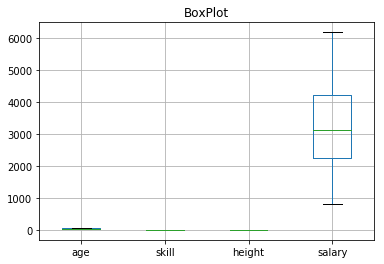

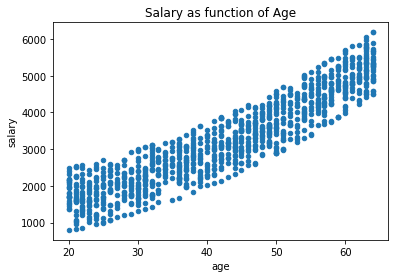

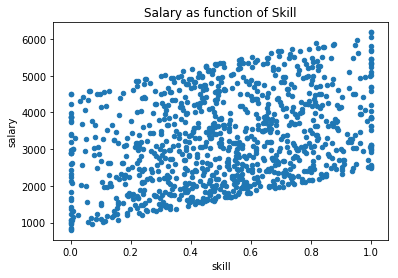

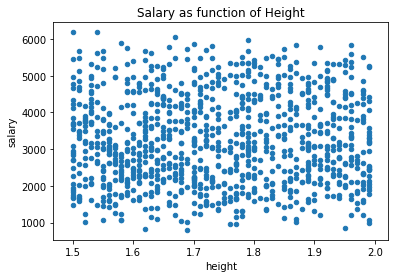

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

df2.boxplot()
plt.title("BoxPlot")
plt.show()

df2.plot(x="age", y="salary", kind="scatter")
plt.title("Salary as function of Age")
plt.show()

df2.plot(x="skill", y="salary", kind="scatter")
plt.title("Salary as function of Skill")
plt.show()

df2.plot(x="height", y="salary", kind="scatter")
plt.title("Salary as function of Height")
plt.show()

```Save the result as a csv```

In [0]:
df2.to_csv(".\\worker_data.csv")

## Working with real-life data

```read the csv file entitled house_prices_numeric.csv consider writing the following line of code:```
```python
pd.options.display.max_columns=50
```

In [0]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_numeric.csv')

```In the following questions, print your answer if possible, draw a graph or visualize it in any other means. When drawing a graph, add a title to it. Answer the following questions (try using a single line of code for each):```
```
- What is oldest house in the dataset (YearBuilt)?
- What is the highest price (SalePrice) of houses built in that year?
- What is the mean area (LotArea) of houses?
- What is the 50-percentile of the area (LotArea) of houses?
- What is more common: having a fireplace (Fireplaces) in the house, or not having one?
- What is the mean price (SalePrice) of houses that have swimming pools (PoolArea)?
- How many houses were sold every year (YrSold)? Draw a graph using plt.plot or pandas.plot
- What is the distribution of the overall condition of the houses (OverallCond)? Use plt.hist or pandas.hist
- For every number of fireplaces in a house (Fireplaces), compute the mean price of a house, the mean age of the house (we are in 2019) and the count of distinct FullBath values
- Take only houses with MSSubClass > 60. Split into groups according to whether or not the MSSubClass is a multiple of 20. For each group compute the mean, max, min and standard deviation of OverallQual
```

Oldest House:
        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
1349  1350          70         50.0     5250            8            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
1349       1872          1987         0.0         259  ...           0   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
1349           54             20          0            0         0        0   

      MoSold  YrSold  SalePrice  
1349      12    2008     122000  

[1 rows x 38 columns]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Highest Price:
755000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Mean Area:
10516.828082191782
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Area 50-percentile:
9478.5
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

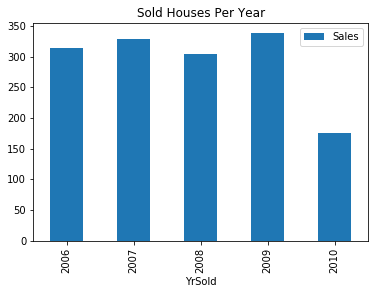

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Overall Condition:


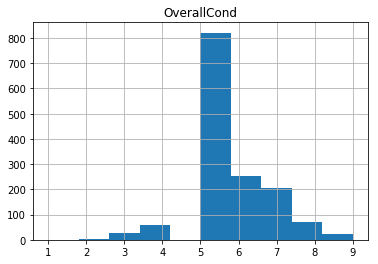

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Fireplace Statistics: 
                SalePrice  YearBuilt  FullBath
Fireplaces                                    
0           141331.482609  54.781159         4
1           211843.909231  39.150769         4
2           240588.539130  54.347826         4
3           252000.000000  38.400000         2
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
      OverallCond                   Is a multiple of 20
             mean max min       std                    
False    5.923077   9   1  1.442613               False
True     5.442763   9   2  0.924615                True


In [66]:
CURRENT_YEAR = 2019

# Most of the following code can be wrote in 1-liners, but I prefer the readability.

print("Oldest House:")
print(df[df["YearBuilt"] == df["YearBuilt"].min()])
print("~"*100)

print("Highest Price:")
print(df["SalePrice"].max())
print("~"*100)

print("Mean Area:")
print(df["LotArea"].mean())
print("~"*100)

print("Area 50-percentile:")
print(np.percentile(df["LotArea"], 50))
print("~"*100)

print("Are Fireplaces more common:")
grouped_ownerships = (df["Fireplaces"] > 0).reset_index(name='HasFirePlace').groupby("HasFirePlace").size()
print(grouped_ownerships[True] >= grouped_ownerships[False])
print("~"*100)

print("Mean price for houses with swimming pools:")
print(df[df["PoolArea"] > 0]["SalePrice"].mean())
print("~"*100)

print("Houses sold every year:")
grouped_sold_years = df.groupby("YrSold").size().reset_index(name="Sales")
grouped_sold_years.plot(x="YrSold", y="Sales", kind="bar")
plt.title("Sold Houses Per Year")
plt.show()
print("~"*100)

print("Overall Condition:")
df.hist(column="OverallCond")
plt.show()
print("~"*100)

print("Fireplace Statistics: ")
grouped_by_fireplaces = df.groupby("Fireplaces")
print(grouped_by_fireplaces.agg({'SalePrice': 'mean', 'YearBuilt': lambda x: np.mean(CURRENT_YEAR - x), 'FullBath': lambda x: len(np.unique(x))}))
print("~"*100)

filtered_over_60 = df[df['MSSubClass'] > 60]
filter_func = (lambda df, x: df['MSSubClass'].loc[x] % 20 == 0)
grouped_by_MSSubClass = df.groupby(lambda x: filter_func(df, x))
res = grouped_by_MSSubClass.agg({'OverallCond': ['mean', 'max', 'min', 'std']})
res["Is a multiple of 20"] = res.index
print(res)

## Feature extraction

```Load the complete version of the houses table, entitled "house_prices_larger.csv"```

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_larger.csv')

```As you recall, the feature extraction process is done in order to let us describe the data in more "meaningful" manner. Add the following features to your dataframe:```
- ```LotArea in squared meters ( it's currently in units of squared feet)```
- ```1stFlrSF + 2ndFlrSF```
- ```GarageArea**0.5```
- ```LotArea / (BedroomAbvGr+1)```
- ```LotArea / (mean LotArea for houses built in that same year + 1e-5) - you might want to use``` [pandas merge function](https://www.google.com/search?q=pandas+merge&oq=pandas+merge&aqs=chrome..69i57l2j69i59l3j69i60.2080j0j9&sourceid=chrome&ie=UTF-8)
- ```Ranking of LotArea (largest house has 1, the second largest has 2 and so on)```
- ```One hot encoding of LotConfig - that is, add feature againts every value possible in LotConfig, which is 1 if the sample's LotConfig is this value and 0 otherwise (consider``` [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html))

```make a list of the names of the features you created.```

In [0]:
SQ_FEET_TO_SQ_METER_FACTOR = 0.09290304
MEAN_LOTAREA_OFFSET = 1e-5
FEATURES_COUNT = 11

def get_df_with_features(df, lot=True):
    df['LotArea[meters]'] = df['LotArea'] / SQ_FEET_TO_SQ_METER_FACTOR
    df['FloorSFSum'] = df['1stFlrSF'] + df['2ndFlrSF']
    df['GarageAreaSqrt'] = np.sqrt(df['GarageArea'])
    # Assuming we mean the squared feet LotArea
    df['LotArea over BedroomAbvGr+1'] = df['LotArea'] / (df["BedroomAbvGr"] + 1) 

    grouped_year = df.groupby('YearBuilt')
    means = grouped_year.agg({'LotArea': lambda x: np.mean(x) + MEAN_LOTAREA_OFFSET})

    def update_row(row):
        row['LotArea'] = (float(row['LotArea']) / means.loc[row['YearBuilt']]['LotArea'])
        return row

    df['LotArea over mean LotArea same year'] = df.apply(update_row, axis=1)['LotArea']

    df = df.sort_values(by="LotArea", ascending=False)
    df['LotArea Ranking'] = df.reset_index().index + 1

    if lot:
        indicators_df = pd.get_dummies(df['LotConfig'])
        df = df.join(indicators_df).sort_values(by="SalePrice", ascending=True)
    
    return df
    
final_df = get_df_with_features(df)

## Simple linear model

```Next, we will train a simple linear model, as seen in class, to predict SalePrice. Use the features you computed. Create train and test segments, normalize the data (both the features and the target) and use a linear model. Make sure you don't somehow use the test data when training your model (or when normalizing your data).```

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

['LotArea[meters]', 'FloorSFSum', 'GarageAreaSqrt', 'LotArea over BedroomAbvGr+1', 'LotArea over mean LotArea same year', 'LotArea Ranking', 'Corner', 'CulDSac', 'FR2', 'FR3', 'Inside']
Train: 0.004154220609078178
Test: 0.004882659737243046


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


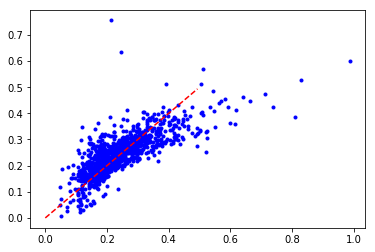

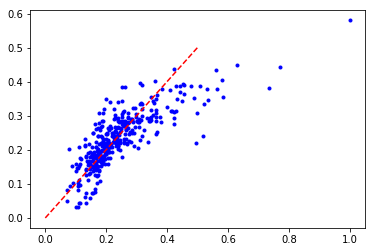

In [70]:
x = final_df[final_df.columns[-FEATURES_COUNT:]].copy()
y = final_df['SalePrice']

print(list(final_df.columns[-FEATURES_COUNT:]))

y /= max(y)
scaler = StandardScaler()
x = scaler.fit_transform(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y)

regressor = LinearRegression(normalize=False)
regressor.fit(x_train, y_train)

y_train_predict = regressor.predict(x_train)
y_test_predict = regressor.predict(x_test)

print("Train: " + str(mean_squared_error(y_train, y_train_predict)))
print("Test: " + str(mean_squared_error(y_test, y_test_predict)))

plt.plot(y_train, y_train_predict, "b.")
plt.plot([0, max(y_train)/2], [0, max(y_train)/2], "r--")
plt.show()

plt.plot(y_test, y_test_predict, "b.")
plt.plot([0, max(y_test)/2], [0, max(y_test)/2], "r--")
plt.show()

```Next, we will add extra features: for any feature you computed earlier, add feature**2 and feature**3. Now use Ridge regression (regularized linear regression, as we discussed in class). Draw graphs of the loss computed on the train and on the validation as a function of the regularization parameter, for``` 1$\leq\alpha\leq$30. ```What regularization would it be best to take?```

In [71]:
from sklearn.linear_model import Ridge
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_special.csv')

# Here there is not lotconfig so I will ignore it.
final_df = get_df_with_features(df, lot=False)
x = final_df[final_df.columns[-6:]].copy()
y = final_df['SalePrice']


y /= max(y)
scaler = StandardScaler()
xnew = x.copy()

for feature in xnew.columns:
    for i in range(2, 4):
        xnew[feature + str(i)] = xnew[feature]**i
        
xnew = scaler.fit_transform(xnew, y)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


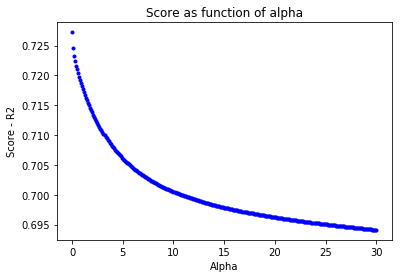

Max score for alpha = 0.0


In [72]:
alphas = []
scores = []



X_train, X_test, y_train, y_test = train_test_split(xnew, y, test_size=0.3, random_state=1)

# Normalize
maxytrain = max(y_train)
y_train = y_train / maxytrain
y_test = y_test / maxytrain

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)


for alpha10 in range(0, 301):
    alpha = alpha10 / 10
    clf = Ridge(alpha=alpha, normalize=False)
    alphas.append(alpha)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_val, y_val))

plt.plot(alphas, scores, "b.")
plt.title("Score as function of alpha")
plt.ylabel("Score - R2")
plt.xlabel("Alpha")
plt.show()

print("Max score for alpha = " + str(alphas[np.argmax(scores)]))


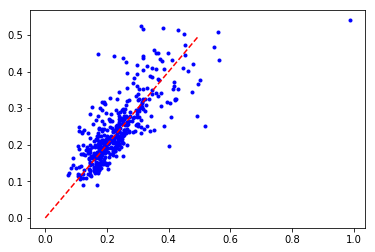

In [73]:
alpha = 0
clf = Ridge(alpha=alpha)

clf.fit(X_train, y_train)
y_test_predict = clf.predict(X_test)

plt.plot(y_test, y_test_predict, "b.")
plt.plot([0, max(y_test)/2], [0, max(y_test)/2], "r--")
plt.show()